In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network

from os import listdir
from os.path import isfile, join

from sklearn.datasets import load_digits  

# For picture manipulation
from PIL import Image

# For creating directories
import os

### Getting list of files in dir

In [2]:
folder = "tests"
file_list = [f for f in listdir(folder) if isfile(join(folder, f))]

In [3]:
if("tests.csv" in file_list):
    file_list.remove("tests.csv")
if(".DS_Store" in file_list):
    file_list.remove(".DS_Store")
file_list

['test10.png',
 'test6.png',
 'test7.png',
 'test5.png',
 'test4.png',
 'test0.png',
 'test1.png',
 'test3.png',
 'test2.png',
 'test9.png',
 'test8.png']

### Scaling Down Images

In [4]:
# Scales all images down to 28x28 to match the mnist dataset
images_scaled = []
for file in file_list:
    mypath = folder + "/" + file
    # Getting original file
    image = Image.open(mypath)
    # Scaling image down
    images_scaled.append(image.resize((28, 28)))

In [5]:
images_scaled

[<PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66050>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66650>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66750>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EED78D0>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66790>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF666D0>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66810>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66850>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF60810>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66990>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A1EF66950>]

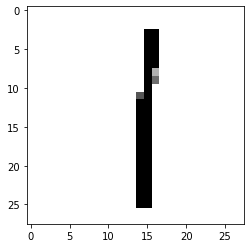

In [6]:
plt.imshow(images_scaled[0], cmap=plt.cm.binary)

In [8]:
# Turning images into numerical values representing
#  brightness of each pixel
digits_mono = []
for i in images_scaled:
    digits_mono.append(np.asarray( i, dtype="int32" ))

final_digits = []
for digit, i in zip(digits_mono, range(len(digits_mono))):
    final_digits.append([])
    for row in digit:
        for pixel in row:
           final_digits[i].append(int( ((sum(pixel)/len(pixel))*-1)+255 ))

# final_digits = [np.array(i).reshape(28,28) for i in final_digits]
final_digits = np.array(final_digits)
final_digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
clf_math = 0
with open('clf_just_math.pk', 'rb') as fin:
    clf_math = pickle.load(fin)

clf_digi = 0
with open('clf_just_digits.pk', 'rb') as fin:
    clf_digi = pickle.load(fin)

clf_all = 0
with open('clf.pk', 'rb') as fin:
    clf_all = pickle.load(fin)

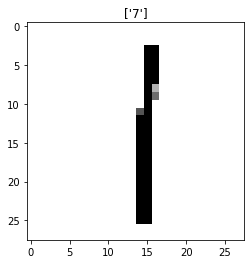


clf_math
-  ::  3.3799532449041122e-130
,  ::  2.560202560057652e-22
)  ::  1.0409539896218383e-11
(  ::  0.9999999999895905

clf_digi
6  ::  7.409173691030395e-06
9  ::  0.002216839063722797
7  ::  0.01571787664396197
5  ::  0.9809816875364229

clf_all
9  ::  0.0013562335787170004
2  ::  0.003591090462915955
1  ::  0.09380202264864698
7  ::  0.9000914765686227





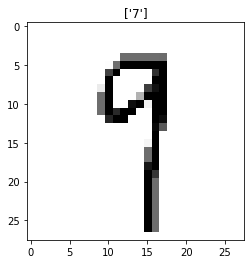


clf_math
-  ::  1.421423007899779e-46
)  ::  1.1782496937521446e-36
,  ::  4.655484056233992e-22
(  ::  1.0

clf_digi
5  ::  0.05186027567270458
6  ::  0.0846665672991416
9  ::  0.14159077347328308
7  ::  0.6497065656796271

clf_all
1  ::  0.00021986797807675568
3  ::  0.015519156064349211
9  ::  0.01748083977971482
7  ::  0.9663555171445252





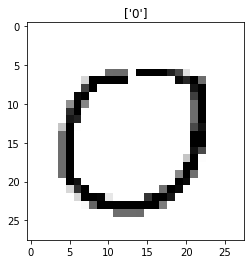


clf_math
)  ::  9.177041880222705e-153
,  ::  6.074159619188754e-141
-  ::  7.337182929084295e-94
(  ::  1.0

clf_digi
7  ::  0.0011689052231746498
9  ::  0.0027826143754526903
6  ::  0.008091852493624475
4  ::  0.9729880347463937

clf_all
9  ::  0.0020228325268088934
3  ::  0.00960955500105547
5  ::  0.11671749106151905
0  ::  0.8686676229520953





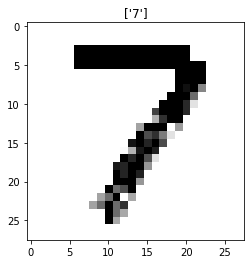


clf_math
)  ::  2.0163741164011824e-84
-  ::  5.72688924434246e-69
,  ::  3.1179838188847885e-38
(  ::  1.0

clf_digi
9  ::  8.603923179334612e-13
5  ::  3.699161110971329e-11
7  ::  2.9439508874458885e-05
6  ::  0.9999705567058089

clf_all
5  ::  3.8542712712972444e-09
8  ::  6.359847193790244e-08
4  ::  5.129625249029623e-05
7  ::  0.9999486362268356





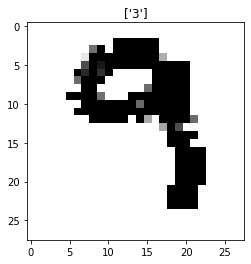


clf_math
)  ::  1.6091954978454876e-187
-  ::  1.4957082056890642e-171
,  ::  2.359750871160007e-171
(  ::  1.0

clf_digi
6  ::  8.306892884494662e-05
5  ::  0.0011181405170002873
9  ::  0.002524269878962051
7  ::  0.9956649018639189

clf_all
7  ::  0.0038950287628081006
1  ::  0.0040007982215125755
2  ::  0.38038939778599373
3  ::  0.6098307282031449





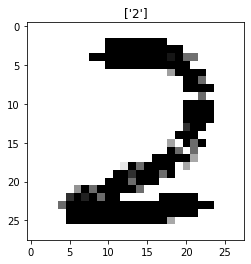


clf_math
-  ::  1.0551655829598623e-198
)  ::  1.1132426138245968e-168
,  ::  2.2528024712862252e-112
(  ::  1.0

clf_digi
9  ::  9.633820963044716e-12
5  ::  6.310863777914066e-08
7  ::  3.1538504554823745e-05
6  ::  0.999968350252278

clf_all
8  ::  0.00956012799142574
1  ::  0.018509813736167783
3  ::  0.044497019864095315
2  ::  0.9265035103957147





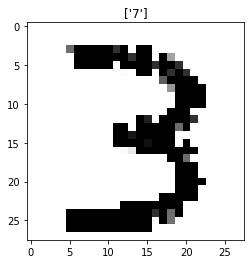


clf_math
-  ::  1.0926259067771852e-148
,  ::  1.029402996672104e-53
)  ::  1.984384415215714e-31
(  ::  1.0

clf_digi
6  ::  3.8150979982211044e-20
5  ::  7.893740429408175e-08
7  ::  0.3224528811494081
9  ::  0.6775462104692279

clf_all
3  ::  2.681569943317411e-13
5  ::  5.6869835542173085e-11
9  ::  3.7608219706394127e-08
7  ::  0.9999999623346404





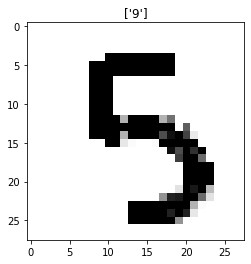


clf_math
)  ::  8.51609671729985e-159
-  ::  4.6143289067975414e-150
,  ::  1.0997195652992065e-129
(  ::  1.0

clf_digi
8  ::  1.536814246537028e-10
5  ::  1.746243600093373e-07
7  ::  1.242806340223478e-05
9  ::  0.4453981582193322

clf_all
8  ::  0.01433723607189182
5  ::  0.0492932360013773
3  ::  0.051623746211811344
9  ::  0.8828870697853742





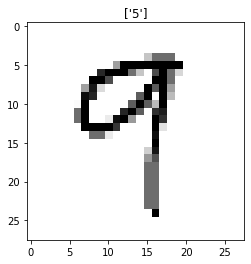


clf_math
,  ::  8.83934327386172e-44
)  ::  1.7036021256200615e-43
-  ::  8.160161087013379e-33
(  ::  1.0

clf_digi
5  ::  0.06734137569797978
6  ::  0.1834197332471383
9  ::  0.18911691685656298
7  ::  0.41774848680216736

clf_all
7  ::  0.0013812185890618456
8  ::  0.010512710680636621
9  ::  0.042070789879963766
5  ::  0.9451322941454701





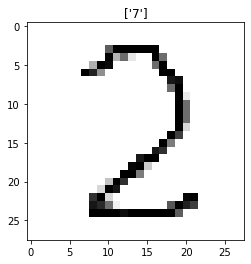


clf_math
-  ::  3.293850808436669e-106
)  ::  6.326141267551065e-55
,  ::  7.484386709675727e-45
(  ::  1.0

clf_digi
9  ::  1.9414097732206982e-05
5  ::  9.478966831074522e-05
7  ::  0.008345868677255506
6  ::  0.9911823101357344

clf_all
4  ::  1.7246058896977273e-06
5  ::  9.461056440387521e-06
(  ::  0.0008746346608482825
7  ::  0.9991129953428863





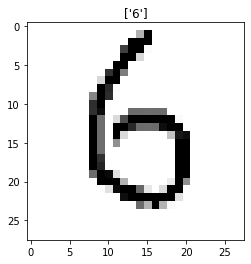


clf_math
+  ::  2.7568292113923894e-77
-  ::  9.254095577846829e-62
,  ::  2.999724096402514e-60
(  ::  1.0

clf_digi
7  ::  6.75129658358517e-08
8  ::  8.74414220182093e-07
5  ::  1.524506134899858e-06
9  ::  0.6981242648083773

clf_all
5  ::  0.0030228736519012163
8  ::  0.0034276840327025866
2  ::  0.006313156732859768
6  ::  0.985174693304334





In [38]:
# final_digits[0] = final_digits[0].reshape(784,1)

classes = ['+', ')', '(', ',', '-']+[str(x) for x in range(10)]

for i in final_digits:
    plt.imshow(i.reshape(28,28),cmap=plt.cm.binary);
#     plt.title(str(clf_math.predict([i]))+str(clf_digi.predict([i])))
    plt.title( clf_all.predict([i]) )

    plt.show()

    print("\nclf_math")
    math_preds = clf_math.predict_proba([i])
    for cls_acc, cls_name in  sorted(zip(math_preds[0], classes[:5]))[-4:]:
        print(cls_name, " :: ", cls_acc)

    print("\nclf_digi")
    digi_preds = clf_digi.predict_proba([i])
    for cls_acc, cls_name in sorted(zip(digi_preds[0], classes[9:]))[-4:]:
        print(cls_name, " :: ", cls_acc)
        
    print("\nclf_all")
    all_preds = clf_all.predict_proba([i])
    for  cls_acc, cls_name in sorted(zip(all_preds[0], classes))[-4:]:
        print(cls_name, " :: ", cls_acc)
        
    print("\n\n")
    

# 

In [39]:
clf_digi.predict_proba([final_digits[0]])

array([[2.74625190e-31, 9.80981688e-01, 7.40917369e-06, 1.57178766e-02,
        1.82440884e-07, 2.21683906e-03, 7.36759787e-08, 2.85330730e-04,
        7.89890604e-04, 7.10131172e-07]])